In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Defining Functions

def dataextract(data,lines):
    f = open(data, "r")
    header = f.readline()
    
    i = 0
    number = np.zeros(lines)
    freq = np.zeros(lines)
    flux = np.zeros(lines)
    error = np.zeros(lines)

    for line in f:
        line = line.strip()
        columns = line.split(",")
        number[i] = float(columns[1])
        freq[i] = float(columns[2])
        flux[i] = float(columns[3])
        error[i] = float(columns[4])    
        i = i + 1

    return number,freq,flux,error

#---------------------------------------------------------------------------------------------------------

def bestfit(freq,source,source_err):
    def f(x,a,n):
        return a*(x**n)
        
    a0,n0 = 0.1,2
    p0 = [a0, n0]
    name = ["a", "n"]
    
    tmodel = np.linspace(np.min(freq),np.max(freq),1000)
    ystart = f(tmodel,*p0)
    
    popt, pcov = curve_fit(f,freq,source,p0,sigma=source_err,absolute_sigma=True)

    dymin = (source - f(freq,*popt))/source_err
    min_chisq = sum(dymin*dymin)
    dof = len(freq) - len(popt)
    
    print("Fitted parameters with 68% C.I.:")
    for i, pmin in enumerate(popt):
        print("%2i %-10s %12f +/- %10f"%(i,name[i],pmin,np.sqrt(pcov[i,i])*np.sqrt(min_chisq/dof)))
        
    yfit = f(tmodel,*popt)
    return tmodel,yfit

Fitted parameters with 68% C.I.:
 0 a            154.088931 +/-  16.056373
 1 n             -0.772593 +/-   0.014698
Fitted parameters with 68% C.I.:
 0 a              1.492442 +/-   0.216776
 1 n             -0.602387 +/-   0.020454
Fitted parameters with 68% C.I.:
 0 a              8.430980 +/-   1.529766
 1 n             -0.723232 +/-   0.025581
Fitted parameters with 68% C.I.:
 0 a             35.850343 +/-   7.664362
 1 n             -0.866218 +/-   0.030182
Fitted parameters with 68% C.I.:
 0 a              0.328984 +/-   0.063768
 1 n             -0.367788 +/-   0.027234


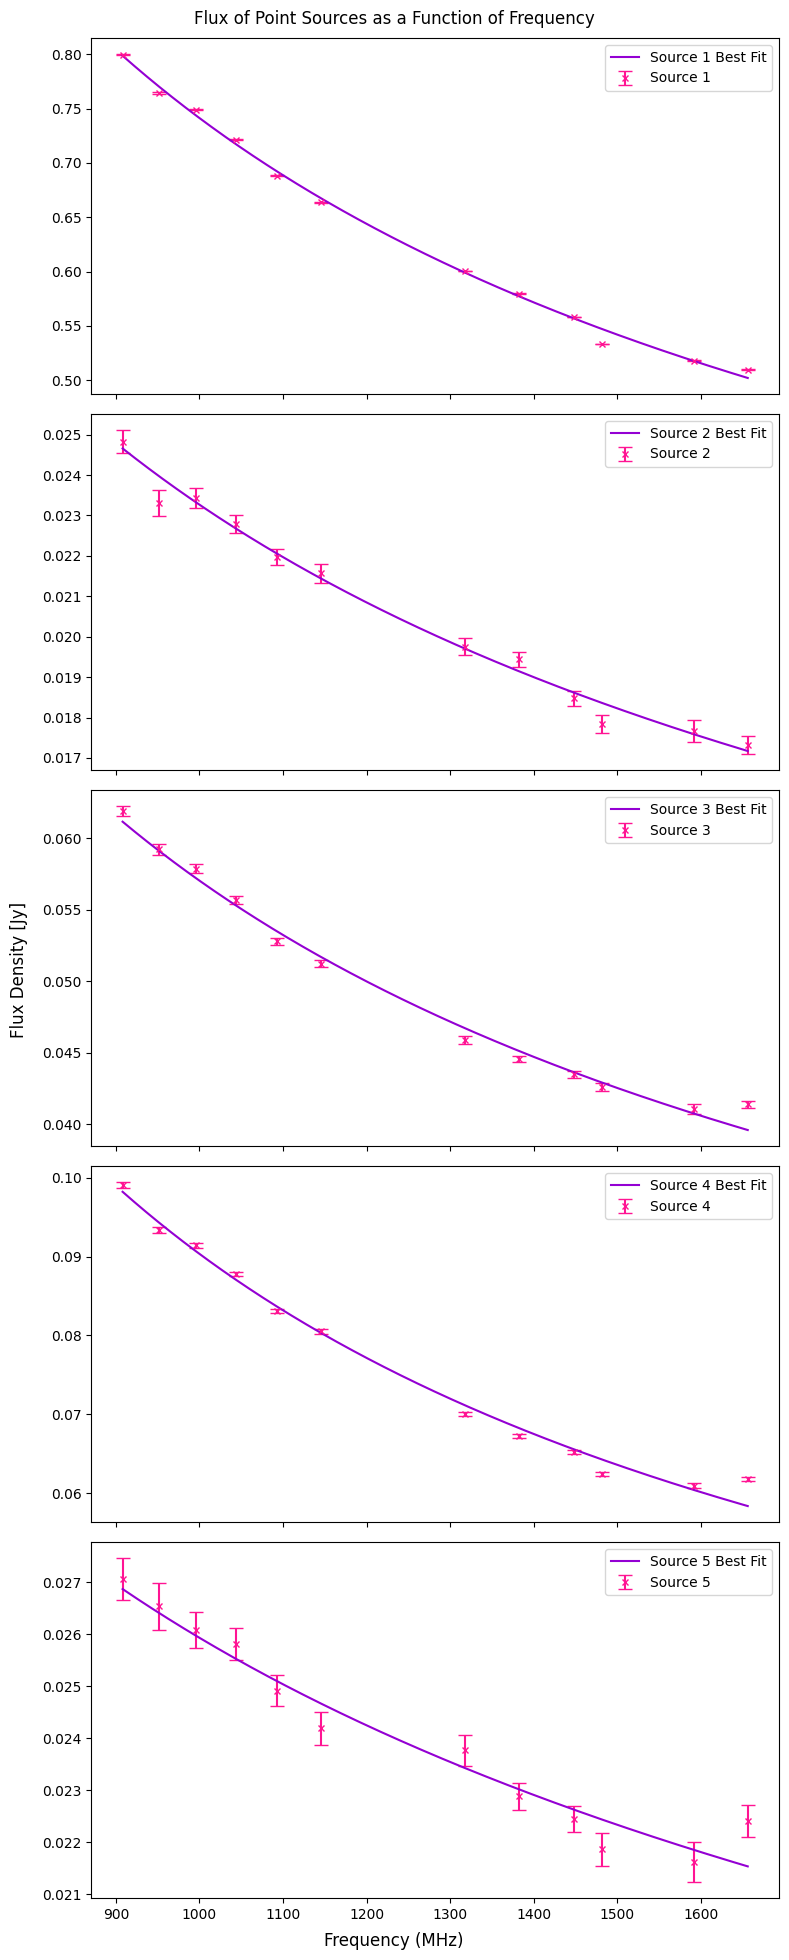

In [3]:
# Plotting and Fitting Initial Data

number,freq,flux,error = dataextract("Fluxes.csv",60)

freq = list(set(freq))
freq.sort()

source1,source1err = [],[]
source2,source2err = [],[]
source3,source3err = [],[]
source4,source4err = [],[]
source5,source5err = [],[]

sources = [source1, source2, source3, source4, source5]
errors = [source1err, source2err, source3err, source4err, source5err]

for i in range(len(number)):
    if number[i] == 1:
        source1.append(flux[i])
        source1err.append(error[i])
    if number[i] == 2: 
        source2.append(flux[i])
        source2err.append(error[i])
    if number[i] == 3:
        source3.append(flux[i])
        source3err.append(error[i])
    if number[i] == 4:
        source4.append(flux[i])
        source4err.append(error[i])
    if number[i] == 5:
        source5.append(flux[i])
        source5err.append(error[i])


fig, axs= plt.subplots(5, 1, sharex=True,figsize=[8,20])

for i in range(len(sources)):
    model, fit = bestfit(freq, sources[i], errors[i])

    axs[i].errorbar(freq,sources[i],errors[i],label=f"Source {i + 1}",capsize=5, fmt='x', markersize=5, color='deeppink')
    axs[i].plot(model,fit,label=f"Source {i + 1} Best Fit", color='darkviolet')
    axs[i].legend()
    
fig.supylabel("Flux Density [Jy]")
fig.supxlabel("Frequency (MHz)")
fig.suptitle("Flux of Point Sources as a Function of Frequency")
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()


Fitted parameters with 68% C.I.:
 0 a            154.102919 +/-  15.316616
 1 n             -0.772606 +/-   0.014019
Fitted parameters with 68% C.I.:
 0 a              1.541052 +/-   0.248796
 1 n             -0.606842 +/-   0.022739
Fitted parameters with 68% C.I.:
 0 a              8.449737 +/-   1.461432
 1 n             -0.723541 +/-   0.024385
Fitted parameters with 68% C.I.:
 0 a             35.930593 +/-   7.320756
 1 n             -0.866529 +/-   0.028766
Fitted parameters with 68% C.I.:
 0 a              0.324715 +/-   0.059693
 1 n             -0.365975 +/-   0.025837


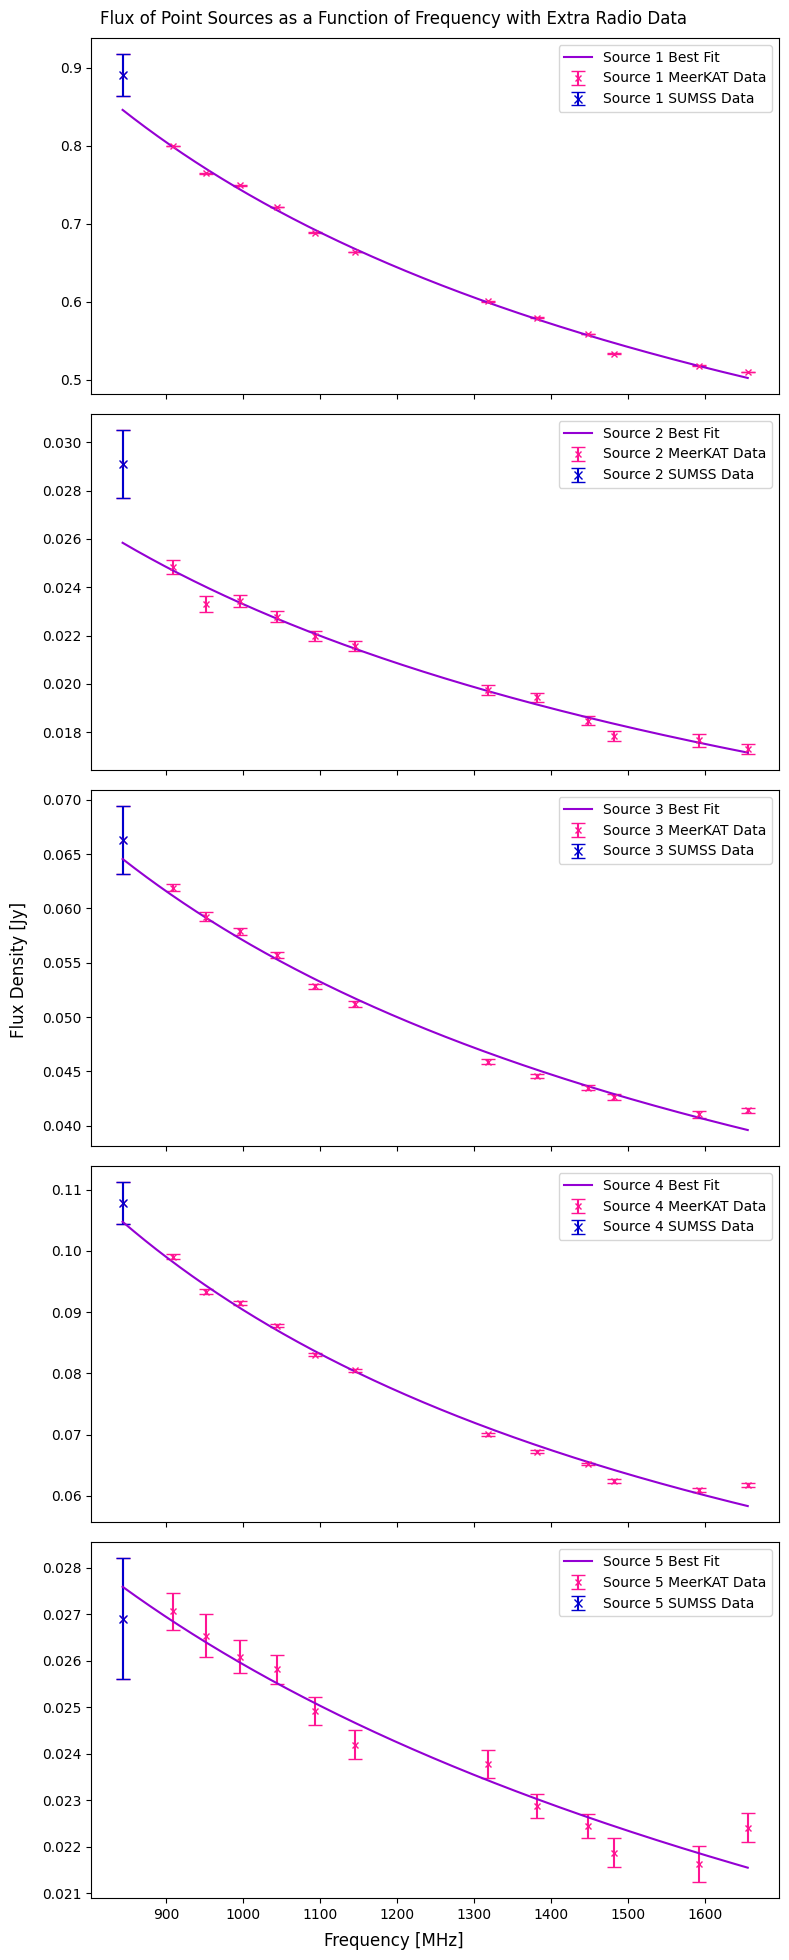

In [4]:
# Plotting and Fitting Extra Data from SUMSS

newfluxes =np.array([890.6, 29.1, 66.3, 107.8, 26.9])/1000
newerr = np.array([26.7, 1.4, 3.1, 3.4, 1.3])/1000

for i in range(len(sources)):
    sources[i].append(newfluxes[i])
    errors[i].append(newerr[i])

freq.append(np.float64(843))

sources = [source1, source2, source3, source4, source5]
errors = [source1err, source2err, source3err, source4err, source5err]

fig, axs= plt.subplots(5, 1, sharex=True,figsize=[8,20])

for i in range(len(sources)):
    model, fit = bestfit(freq, sources[i], errors[i])

    axs[i].errorbar(freq,sources[i],errors[i],label=f"Source {i + 1} MeerKAT Data",capsize=5, fmt='x', markersize=5, color='deeppink')
    axs[i].errorbar(843,newfluxes[i],newerr[i],label=f"Source {i + 1} SUMSS Data",capsize=5, fmt='x', markersize=6, color='mediumblue')
    axs[i].plot(model,fit,label=f"Source {i + 1} Best Fit", color='darkviolet')
    axs[i].legend()
    
fig.suptitle("Flux of Point Sources as a Function of Frequency with Extra Radio Data")
fig.supxlabel("Frequency [MHz]")
fig.supylabel("Flux Density [Jy]")
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()
